In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
dataset = pd.read_parquet("lumen_dataset/data/lumen")
dataset.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hotel_id                       119210 non-null  int32         
 1   datum_dolaska                  119210 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    119210 non-null  datetime64[ns]
 3   datum_odjave                   119210 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  44199 non-null   object        
 5   broj_odraslih_gostiju          119210 non-null  int64         
 6   broj_djece_gostiju             119210 non-null  float64       
 7   zemlja_gosta                   119210 non-null  object        
 8   kanal_prodaje_id               119210 non-null  int32         
 9   tip_sobe_id                    119210 non-null  int32         
 10  cijena_nocenja                 119210 non-null  float64       
 11  

# Detaljan pregled dolazaka po mesecima

In [11]:
dataset['datum_dolaska'] = pd.to_datetime(dataset['datum_dolaska'])
dataset['month'] = dataset['datum_dolaska'].dt.month
dataset['year'] = dataset['datum_dolaska'].dt.year
monthly_reservations = dataset.groupby('month').size()

## Pregled dolazaka po mesecima za sve hotele i sve godine

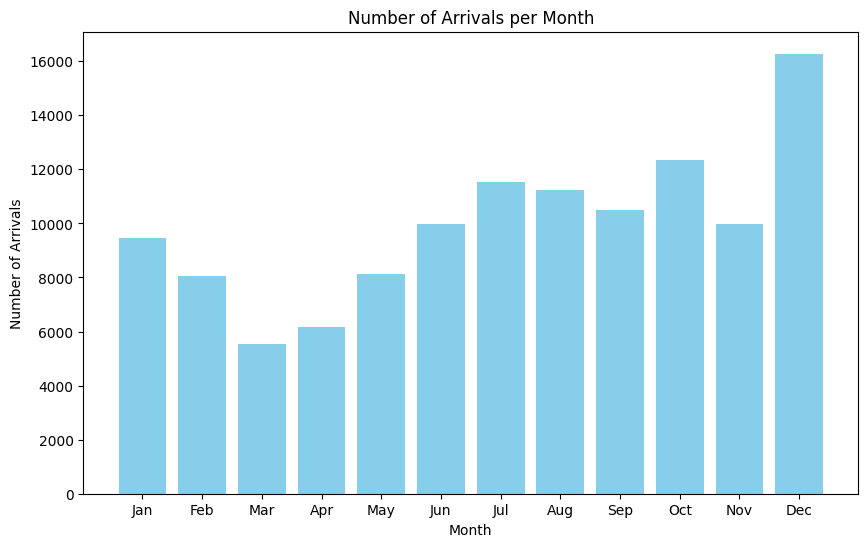

In [6]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the figure size
plt.bar(monthly_reservations.index, monthly_reservations.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.title('Number of Arrivals per Month')
plt.xticks(monthly_reservations.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

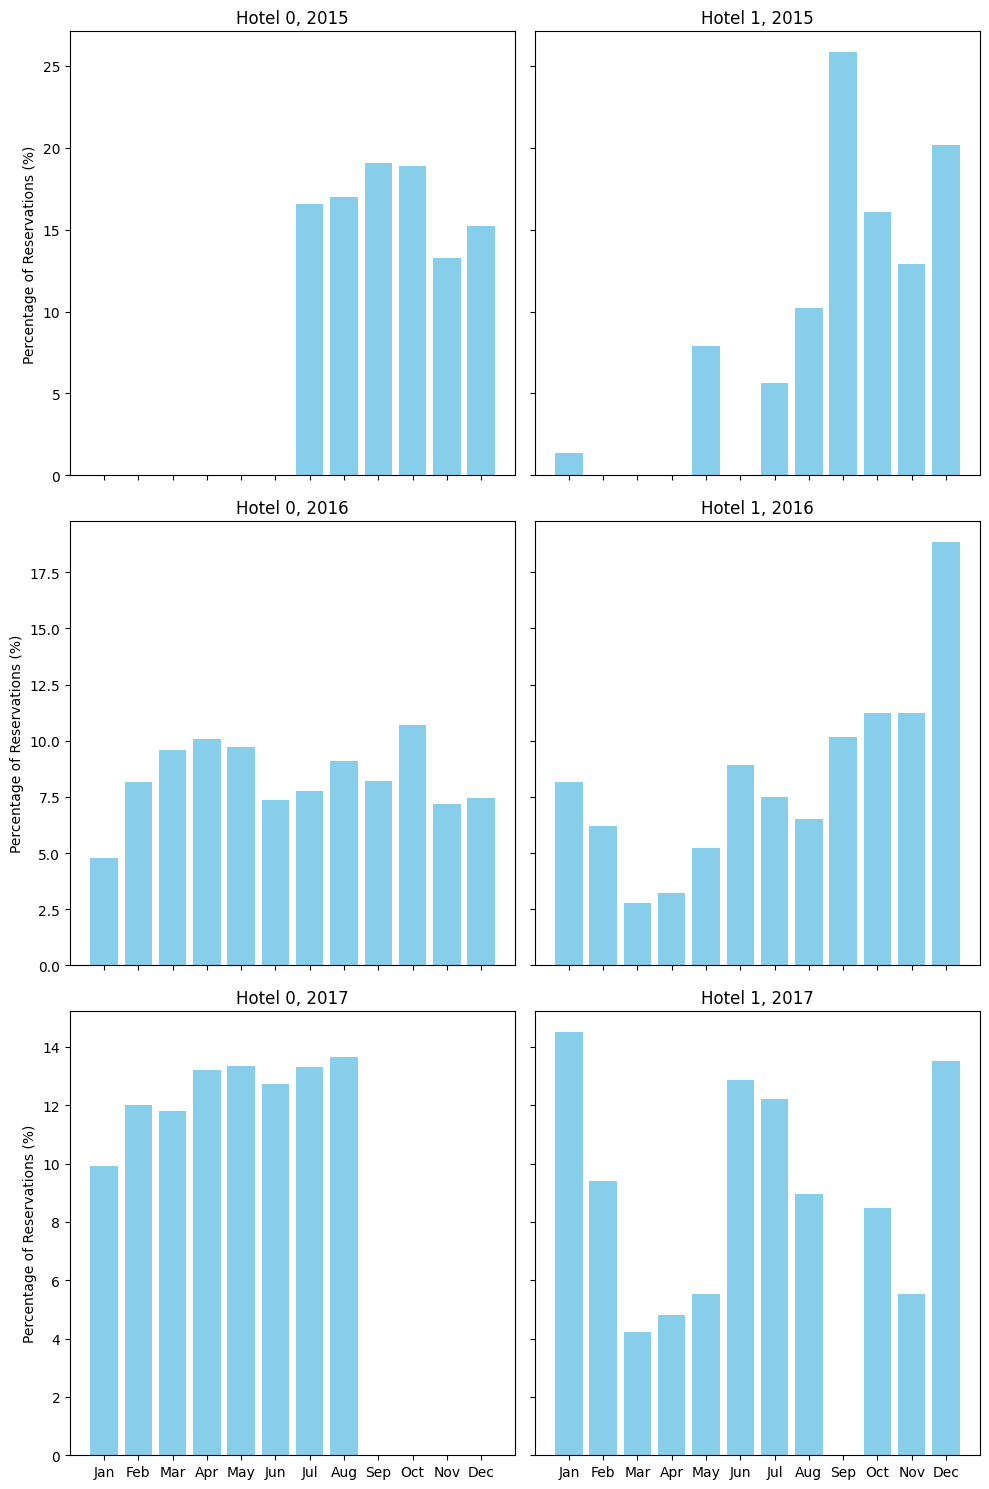

In [12]:
reservations_count = dataset.groupby(['hotel_id', 'year', 'month']).size().unstack(fill_value=0)

reservations_percentage = reservations_count.div(reservations_count.sum(axis=1), axis=0).fillna(0) * 100

unique_years = sorted(dataset['year'].unique())
unique_hotels = sorted(dataset['hotel_id'].unique())
num_years = len(unique_years)
num_hotels = len(unique_hotels)

fig, axs = plt.subplots(num_years, num_hotels, figsize=(5 * num_hotels, 5 * num_years), sharex='col', sharey='row')

for i, year in enumerate(unique_years):
    for j, hotel_id in enumerate(unique_hotels):
        if num_years == 1 or num_hotels == 1:  
            ax = axs[max(i, j)]
        else:
            ax = axs[i, j]
        
        data = reservations_percentage.xs((hotel_id, year), level=('hotel_id', 'year')).T
        
        ax.bar(data.index, data.values.flatten(), color='skyblue')
        ax.set_title(f'Hotel {hotel_id}, {year}')
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        if j == 0:
            ax.set_ylabel('Percentage of Reservations (%)')

plt.tight_layout()
plt.show()